In [3]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

[0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
(41, 101) (41, 101) (41, 101)
1.0000000000000002


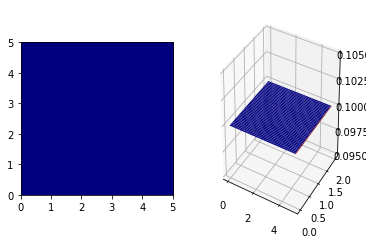

In [52]:
## 2D Uniform pdf

fig = plt.figure()
jet = plt.cm.jet
x = np.linspace(0, 5, 101)

y = np.linspace(0, 2, 41)
X, Y = np.meshgrid(x, y)

uni_x = stats.uniform.pdf(x, loc=0, scale=5)
uni_y = stats.uniform.pdf(y, loc=0, scale=2)
print(uni_x)

# 2D uniform pdf
M = np.dot(uni_y[:, None], uni_x[None, :])
# print(uni_y)
# print(M)
plt.subplot(121)
im = plt.imshow(M, origin='lower', cmap=jet, extent=(0, 5, 0, 5))

ax = fig.add_subplot(122, projection='3d')
print(X.shape, Y.shape, M.shape)
ax.plot_surface(X, Y, M, cmap=jet)
print(np.sum(M) / 41 / 101 * 10)

stats.expon.pdf(x, scale=3) ~ $$ p(x) =  \frac{1}{3} e^{-\frac{x}{3}}$$

0.8129212572213245
0.8010248485790612
(41, 101) (41, 101) (41, 101)
0.14736989592602934


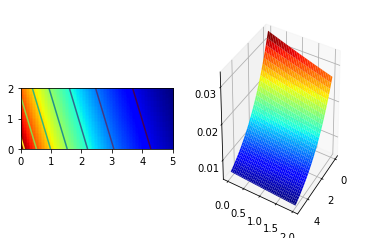

In [62]:
fig = plt.figure()
jet = plt.cm.jet
x = np.linspace(0, 5, 101)
y = np.linspace(0, 2, 41)
X, Y = np.meshgrid(x, y)

ex = stats.expon.pdf(x, scale=3)
ey = stats.expon.pdf(y, scale=10)

print(np.sum(ex) * 5 / 101)
print(np.sum(ex) * 2 / 41)

plt.subplot(121)
M = np.dot(ey[:, None], ex[None, :])

CS = plt.contour(X, Y, M)
im = plt.imshow(M, origin='lower', cmap=jet, extent=(0, 5, 0, 2))


ax = fig.add_subplot(122, projection='3d')
print(X.shape, Y.shape, M.shape)
ax.plot_surface(X, Y, M, cmap=jet)
ax.view_init(azim=390)

# 途中までしか確率密度関数を図示していないので、積分しても1にならない
print(np.sum(M) / 101 / 41 * 10)

[1.05] [3.05]


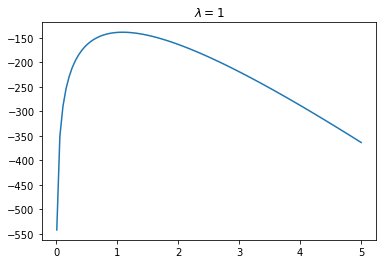

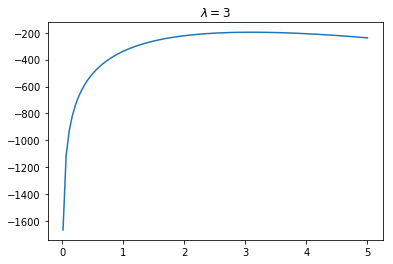

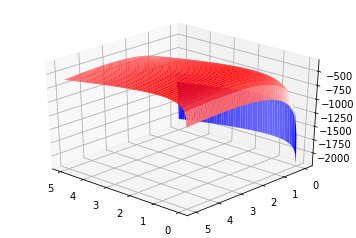

In [153]:
N = 100
param1 = 1
param2 = 3
data = np.concatenate([
    stats.poisson.rvs(param1, size=(N, 1)),
    stats.poisson.rvs(param2, size=(N, 1))
    
], axis=1)
# print(data)

# 0だと発散するのでNG
x = y = np.linspace(.01, 5, 100)
X, Y = np.meshgrid(x, y)
lxa = np.log(np.array([stats.poisson.pmf(data[:, 0], _x) for _x in x]))
lx = lxa.sum(axis=1)
lya = np.log(np.array([stats.poisson.pmf(data[:, 1], _y) for _y in y]))
ly = lya.sum(axis=1)
# サンプル数Nでの尤度関数
fig = plt.figure()
plt.plot(x, lx)
plt.title("$\lambda=1$")
fig = plt.figure()
plt.plot(y, ly)
plt.title("$\lambda=3$")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

XX, YY = np.meshgrid(lx, ly)
L = XX + YY

# 対数尤度の極値を持つλ(x, y)
print(np.where(L==L.max())[1] / 20, np.where(L==L.max())[0] / 20)
ax.plot_surface(X, Y, L, cmap='bwr')
ax.view_init(azim=133)